

<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">Regressing neural activity against running</h3>
<h3 align="center">CSHL Neural Data Analysis</h3>
<h3 align="center">Tuesday July 23, 2019</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file=r'/Users/saskiad/brain_observatory/manifest.json'

boc = BrainObservatoryCache(manifest_file=manifest_file)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Get the data you need. </h1>

</div>

Use the cell id you used earlier. Or switch with a friend. Get the data for this experiment and get the dff traces and running speed

In [280]:
cell_id = 

Find the session id for the session that this cell was imaged for the drifting grating stimulus. Use the session id to access the data for the experiment to get the dff traces and the running speed of the mouse.

In [281]:
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])
session_id = exps[0]['id']
data_set = boc.get_ophys_experiment_data(session_id)

2019-07-19 21:04:21,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/606290198


In [ ]:
ts, dff =

In [ ]:
dxcm, ts = 

Plot the running speed of the mouse in this experiment. Calculate the fraction of the time the mouse spends running (eg. how much of the time is the running speed > 1cm/s?)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: How well can we predict the summed activity of all neurons using running speed?</h1>


</div>

We're going to start by trying to use the running speed to predict the total activity of all the neurons in this experiment.

Plot the summed activity of all neurons.

Running activity is fairly coarse, so rather than try to predict the activity at 30Hz, let's bin the activity (summed across all neurons) into bins of 5 seconds

In [ ]:
num_bins = int(ts.max())/5

In [376]:
run_bin = np.empty((num_bins))
response_bin = np.empty((num_bins))

populate these arrays with binned running and activity (respectively)

BEWARE: the running trace has NaNs at the start - as the running data is recorded for slightly less time than the 2P imaging. Remove the NaNs from the running trace, and remove those same data points from the summed activity trace.
Hint: <b>np.isfinite</b> is helpful here.

We will use <b>scipy.linalg.lstsq</b> to do a linear regression. 

In [393]:
from scipy.linalg import lstsq

First, we need to hold out data to use to test the regression. Suggestion: look at your running trace to make smart choices about what chunk of data to hold out. 

In [379]:
response_bin -= response_bin.mean()
run_bin -= run_bin.mean()

coef = lstsq(run_bin[200:,None], response_bin[200:,None])[0][0]
print(coef)

[  2.86347015e-05]


This gives us the slope of a simple linear equation: 

response = slope x running

Now test your regression on the held out data. Compute the pearson coefficient of your prediction with the data. How well did you predict the running?

In [382]:
predict = coef*run_bin[:200]

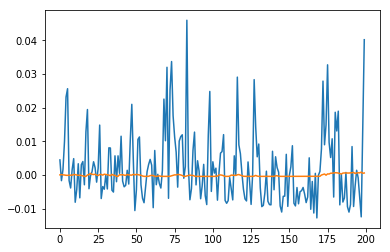

In [383]:
plt.plot(response_bin[:200])
plt.plot(predict)

In [384]:
st.pearsonr(response_bin[:200], predict)

(0.11578490502344981, 0.10253672308423427)

Perhaps the relationship isn't linear. Now repeat the process to do a polynomial prediction. 

To do this, make an array sized (num_bins, 5) where each column is running, running^2, running^3, etc. 

The lstsq regression will return coefficients for each of these terms. 

Does your prediction improve?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 3: How well can we predict the activity of individual neurons using running speed?</h1>
Do the same process for individual neurons. What the best prediction you get? What is the equation for that prediction?

</div>

Get the dff trace for your specific cell. Hint: get_dff_traces takes cell id as an optional input.

Repeat the regression for this cell. Test on held out data. How did it perform?

What's the best prediction you have for a neuron in your experiment? 